In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sklearn as sk
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression
from sklearn.metrics import mean_squared_error


#read data into data frame
df = pd.read_csv("Fish.csv")


In [2]:
#Cleaning data before analysis
df.describe()

#Drop rows where any value is 0
#Replace 0 with NaN
df = df.replace(0, np.nan)
#Drop all NaN
df = df.dropna()

# if there are duplicate values, drop them
df.drop_duplicates(inplace = True)





Testing data amount 48
Training data amount 110


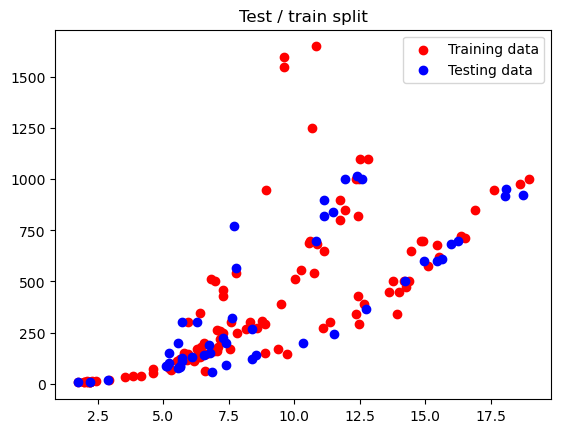

In [3]:
#1 Randomly split dataset with 70/30 training and test dataset
#if another feature should be used to predict the Weight, change "independent"
independent = df.Height

X_train, X_test, y_train, y_test = train_test_split(independent, df.Weight, test_size=0.30)

# train = data that will be used to train the regressor, test = data that will be used to test the regressor based on "rules" learned on training data

print("Testing data amount", len(X_test.index))
print("Training data amount", len(X_train.index))

#Visualize split of test and training data
plt.scatter(X_train, y_train, label="Training data", color="r")
plt.scatter(X_test, y_test, label="Testing data", color="b")
plt.legend()
plt.title("Test / train split")
plt.show()
#Split into y (weight, predicted values) and x (features e.g. Height)



In [4]:
#Linear Regression
lr = LinearRegression()
# Fit the linear  regressor to our training data
lr.fit(X_train.values.reshape(-1,1), y_train.values)
# Use the linear regressor to predict outputs for our test data
lrPrediction = lr.predict(X_test.values.reshape(-1,1))

In [5]:
#Regression with Random forest model
rfr = RandomForestRegressor()
# Fit the random forrest regressor to our training data
rfr.fit(X_train.values.reshape(-1,1), y_train.values)
# Use the random forrest regressor to predict outputs for our test data
rfrPrediction = rfr.predict(X_test.values.reshape(-1,1))



In [6]:
#3 calculate RMSE and R2 in the test set
lrRMSE = mean_squared_error(y_test.values, lrPrediction, squared=False)
rfrRMSE = mean_squared_error(y_test.values, rfrPrediction, squared=False)



lrR2 = lr.score(X_test.values.reshape(-1,1),y_test.values)
rfrR2 = rfr.score(X_test.values.reshape(-1,1),y_test.values)



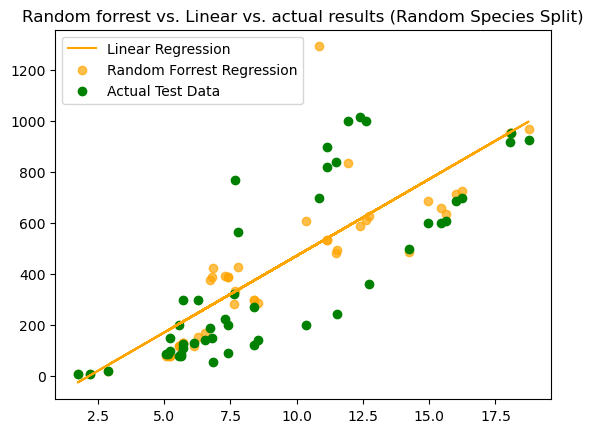

In [7]:
#4 Visualized the predictions and compare the method (y_pred vs y_test)

#plot lr  prediction
plt.plot(X_test, lrPrediction, label="Linear Regression", color="orange")

#plot rfr prediction
plt.scatter(X_test, rfrPrediction, label="Random Forrest Regression", color="orange", alpha=0.7)

#plot actual data
plt.scatter(X_test, y_test, label="Actual Test Data", color="green")

plt.legend()
plt.title("Random forrest vs. Linear vs. actual results (Random Species Split)")
plt.show()

In [8]:
#Task 2
#5. Change the training-test split setting, with the 70/30 principle for each species. 
# #That means, in any of the species, there needs to be 70% of the sample in the training set, and 30% of the sample in the test set.

#find all unqiue species
listOfSpecies = df["Species"].unique()

#create two empty dataframe which will be filled later
newTrain = pd.DataFrame()
newTest = pd.DataFrame()

#iterate through df for each species
for species in listOfSpecies:
    #create dataset with only data for that species
    speciesData = df[df["Species"] == species]

    #use train_test_split on the speciesData
    trainSpecies, testSpecies = train_test_split(speciesData, test_size=0.3)

    #append to previously created dataframes
    newTrain = newTrain.append(trainSpecies)
    newTest = newTest.append(testSpecies)


#Test if its distrubuted correctly
for species in listOfSpecies:
    totalAmount = df[df["Species"]== species]
    inTestSet = newTest[newTest["Species"] == species]
    print(len(inTestSet.index), " of ", len(totalAmount.index), " of ", species, "are in Testset.",  len(inTestSet.index) / len(totalAmount.index), "%")

#split into X and y
X_train_new = newTrain["Height"].values.reshape(-1, 1)
y_train_new = newTrain["Weight"].values

X_test_new = newTest["Height"].values.reshape(-1, 1)
y_test_new = newTest["Weight"].values


11  of  35  of  Bream are in Testset. 0.3142857142857143 %
6  of  19  of  Roach are in Testset. 0.3157894736842105 %
2  of  6  of  Whitefish are in Testset. 0.3333333333333333 %
4  of  11  of  Parkki are in Testset. 0.36363636363636365 %
17  of  56  of  Perch are in Testset. 0.30357142857142855 %
6  of  17  of  Pike are in Testset. 0.35294117647058826 %
5  of  14  of  Smelt are in Testset. 0.35714285714285715 %


C:\Users\julia\AppData\Local\Temp\ipykernel_6084\3661186053.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  newTrain = newTrain.append(trainSpecies)
C:\Users\julia\AppData\Local\Temp\ipykernel_6084\3661186053.py:22: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  newTest = newTest.append(testSpecies)
C:\Users\julia\AppData\Local\Temp\ipykernel_6084\3661186053.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  newTrain = newTrain.append(trainSpecies)
C:\Users\julia\AppData\Local\Temp\ipykernel_6084\3661186053.py:22: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  newTest = newTest.append(testSpecies)
C:\Users\julia\AppData\Local\Temp\

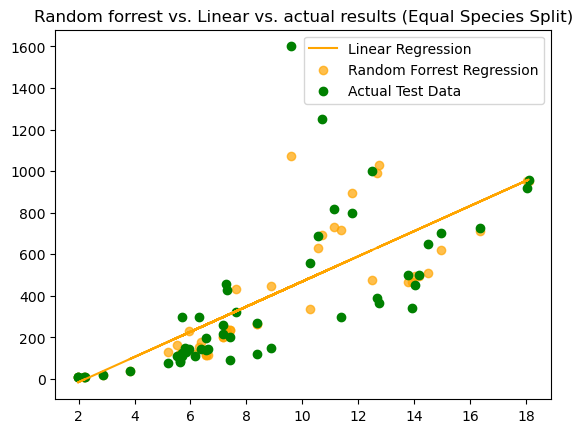

In [9]:
#6. Redo step 2,3,4 in Task1

# 2: Use linear regression, random forest model
lr.fit(X_train_new, y_train_new)
lrPrediction_new = lr.predict(X_test_new)

rfr.fit(X_train_new, y_train_new)
rfrPrediction_new = rfr.predict(X_test_new)


# 3: calculate RMSE and R2 in the test set
lrRMSE_new = mean_squared_error(y_test_new, lrPrediction_new, squared=False)
rfrRMSE_new = mean_squared_error(y_test_new, rfrPrediction_new, squared=False)

lrR2_new = lr.score(X_test_new, y_test_new)
rfrR2_new = rfr.score(X_test_new, y_test_new)



# 4:Visualized the predictions and compare the method (y_pred vs y_test)
#plot lr  prediction
plt.plot(X_test_new, lrPrediction_new, label="Linear Regression", color="orange")

#plot rfr prediction
plt.scatter(X_test_new, rfrPrediction_new, label="Random Forrest Regression", color="orange", alpha=0.7)

#plot actual data
plt.scatter(X_test_new, y_test_new, label="Actual Test Data", color="green")

plt.legend()
plt.title("Random forrest vs. Linear vs. actual results (Equal Species Split)")
plt.show()


In [11]:
#Compare the results in task1 and task2
print("RANDOM SPECIES SPLIT")
print("RMSE for Linear Regression: ", lrRMSE)
print("RMSE for Random Forrest: ", rfrRMSE)
print("R2 for Linear Regression: ", lrR2)
print("R2 for Random Forrest: ", rfrR2)

print("EQUAL SPECIES SPLIT")
print("RMSE for Linear Regression: ", lrRMSE_new)
print("RMSE for Random Forrest: ", rfrRMSE_new)
print("R2 for Linear Regression: ", lrR2_new)
print("R2 for Random Forrest: ", rfrR2_new)

#With a random species split, the RMSE usually is lower and R2 is higher. Therefore, the regression performs better with randomly split species across test and training set. 

RANDOM SPECIES SPLIT
RMSE for Linear Regression:  199.7067509135491
RMSE for Random Forrest:  208.50971445919294
R2 for Linear Regression:  0.6334123990773726
R2 for Random Forrest:  0.6003821612340752
EQUAL SPECIES SPLIT
RMSE for Linear Regression:  247.15854843016953
RMSE for Random Forrest:  211.4390314269235
R2 for Linear Regression:  0.48948892050615644
R2 for Random Forrest:  0.6263850711070511
